<a href="https://colab.research.google.com/github/tornadiego/Basics-of-ML/blob/main/Heart%20Diseases%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WiDS Assignment

## Prabhat

In [ ]:
#general libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# logistic Reg libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
# Addition of these consoles to add files in colab storage
from google.colab import files
import io

# <center> **1st Part**

In [ ]:
#This will give you the console controls
uploaded = files.upload()

In [ ]:
# Reading saved csv file
data = pd.read_csv(io.BytesIO(uploaded['framingham.csv']))

# EDA Part

## 1. Taking a good look at data

In [ ]:
display(data)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


This gave me the following points.

1. There are many NULL values in the data
2. 8 columns are categorical data and other 8 are quantitative.
3. Target variable is 10 year CHD, labelled as TenYearCHD.

In [ ]:
# To see what is the scale of education
print(data['education'].unique())
print(data['age'].max(),data['age'].min())

[ 4.  2.  1.  3. nan]
70 32


In [ ]:
# Looking for suspected outliers 
len(data[data['prevalentStroke'] == True].index)

25

## 2. Visualising the distribution of discrete data

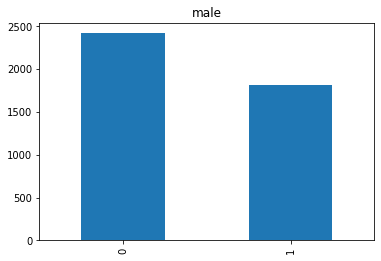

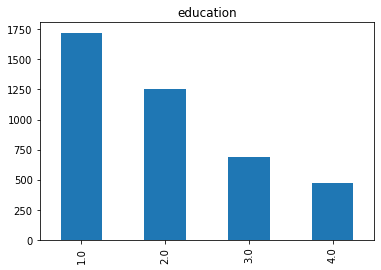

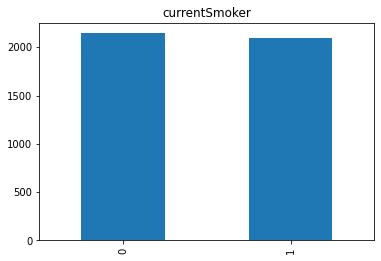

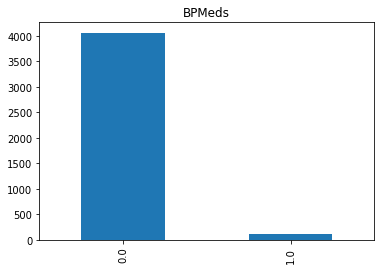

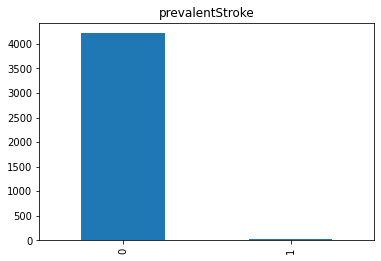

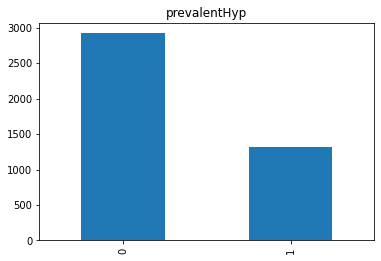

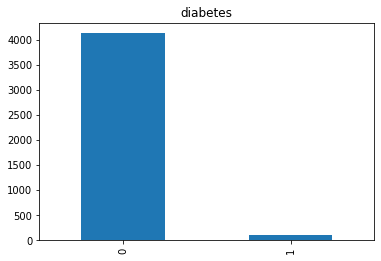

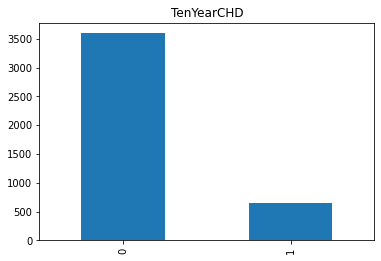

In [ ]:
cols =['male', 'education', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']

for i in cols:
  plt.figure()
  data[i].value_counts().plot.bar()
  plt.title(i)

Fixing glucose column: 

1. looking at distribution

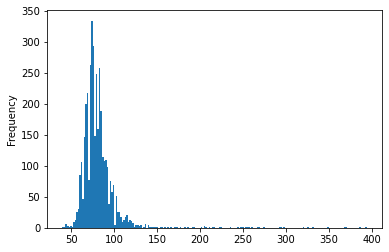

In [ ]:
data['glucose'].plot.hist(bins=200)

2. Looking for Outliers and Quantiles

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

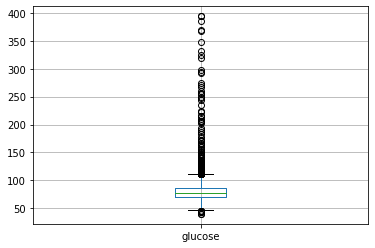

In [ ]:
data.boxplot(column=['glucose'])
data['glucose'].describe()

3. Imputing appropriate values without using sophisticated techniques like KNN.

In [ ]:
# given the data, it looks that 3rd quantile value would be best for fillng up NANs
data['glucose'].fillna(data['glucose'].quantile(q=0.75), inplace=True)

## 3. Looking at Correlation

In [ ]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

One can also remove the binary data as they wont give good correlation results, but I am keeping it by choice so but will be over looking those values. Other discrete variables can stay. 

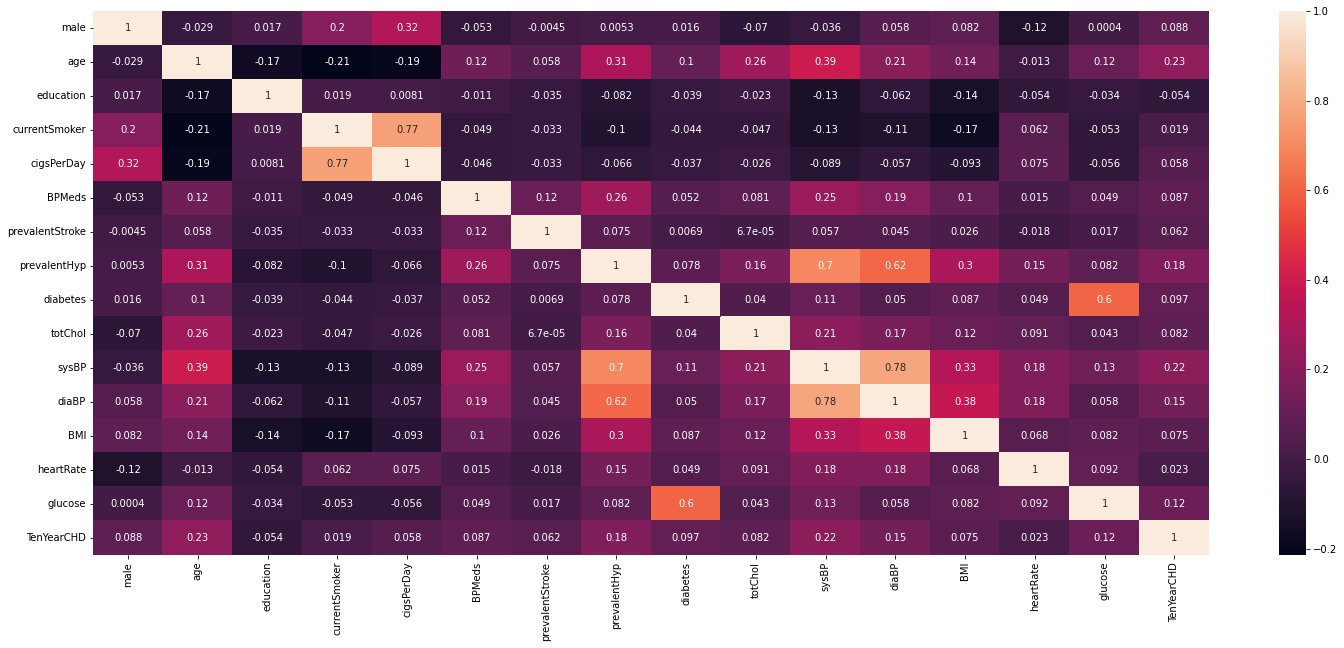

In [ ]:
# comparing data for predictions
plt.figure(figsize=(25,10))
sb.heatmap(data.corr(),annot =True)

Looks like age and SysBP matters the most for predicting a CHD. And since Age is not much of a dynamic variable, I am choosing sysBP data vs TenYearCHD for regression. 

Both will give equally good results as they are complete columns

In [ ]:
# dividing dataset
# target Value
Y = data['TenYearCHD']

# parameter value
X= data['sysBP']


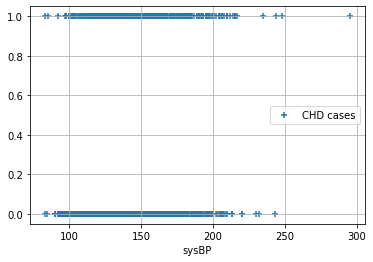

In [ ]:
plt.scatter(X,Y,marker='+',label='CHD cases')
plt.xlabel("sysBP")
plt.legend()
plt.grid()
plt.show()

Starting with Logistic Regression with one variable 

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[['sysBP']],data['TenYearCHD'],test_size=0.2)

In [ ]:
# checking the balance of the training data to testing data

print(Ytrain.value_counts())

0    2873
1     517
Name: TenYearCHD, dtype: int64


In [ ]:
# typical regression commans, first an object (container for model/algorithm for prediction), training and testing.
model = LogisticRegression()
model.fit(Xtrain,Ytrain)
XX = model.predict(Xtest)
err = model.score(Xtest,Ytest)

In [ ]:
print("The accuracy achieved by this regression is")
err

The accuracy achieved by this regression is


0.8514150943396226

In [ ]:
print(classification_report(Ytest,XX))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       0.57      0.03      0.06       127

    accuracy                           0.85       848
   macro avg       0.71      0.51      0.49       848
weighted avg       0.81      0.85      0.79       848



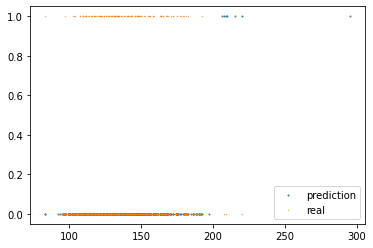

In [ ]:
# to visualing the result
plt.scatter(Xtest,XX,s=0.91,label='prediction')
plt.scatter(Xtest,Ytest,s=0.11,label='real')
plt.legend()

In [ ]:
# doing this for other split ratios

model70 = LogisticRegression()
model90 = LogisticRegression()

Xtrain70, Xtest70, Ytrain70, Ytest70 = train_test_split(data[['sysBP']],data['TenYearCHD'],test_size=0.3)
Xtrain90, Xtest90, Ytrain90, Ytest90 = train_test_split(data[['sysBP']],data['TenYearCHD'],test_size=0.1)

model70.fit(Xtrain70,Ytrain70)
XX70 = model70.predict(Xtest70)
err70 = model70.score(Xtest70,Ytest70)

model90.fit(Xtrain90,Ytrain90)
XX90 = model90.predict(Xtest90)
err90 = model90.score(Xtest90,Ytest90)

print("The score of 90-10 split and 70-30 split are: ",err90,"and",err70,'respectively')

The score of 90-10 split and 70-30 split are:  0.8349056603773585 and 0.8647798742138365 respectively


# Hot Encoding 

Since they are already stored in the data frame as encoded, we 

In [ ]:
categorical_columns = ['male','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD']

# carrying out the hot encoding without removing multicolinearity (as they are directly depended data)
# this would have been important if I were using those columns for regression
for column in categorical_columns:
    tempdf = pd.get_dummies(data[column],prefix=column)
    data = pd.concat([data,tempdf],axis='columns' )
    data = data.drop(columns=column)
print(data.columns)

Index(['age', 'education', 'cigsPerDay', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'male_0', 'male_1',
       'currentSmoker_0', 'currentSmoker_1', 'BPMeds_0.0', 'BPMeds_1.0',
       'prevalentStroke_0', 'prevalentStroke_1', 'prevalentHyp_0',
       'prevalentHyp_1', 'TenYearCHD_0', 'TenYearCHD_1'],
      dtype='object')


In [ ]:
data

,age,education,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0,male_1,currentSmoker_0,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,TenYearCHD_0,TenYearCHD_1
0,39,4.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,1,0,1,0,1,0,1,0,1,0
1,46,2.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,1,0,1,0,1,0,1,0,1,0
2,48,1.0,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,1,1,0,1,0,1,0,1,0
3,61,3.0,30.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,1,0,1,0,0,1,0,1
4,46,3.0,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,1,0,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,1.0,0,313.0,179.0,92.0,25.97,66.0,86.0,0,1,0,1,1,0,1,0,0,1,0,1
4234,51,3.0,43.0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,1,0,1,1,0,1,0,1,0,1,0
4235,48,2.0,20.0,0,248.0,131.0,72.0,22.00,84.0,86.0,1,0,0,1,0,0,1,0,1,0,1,0
4236,44,1.0,15.0,0,210.0,126.5,87.0,19.16,86.0,NaN,1,0,0,1,1,0,1,0,1,0,1,0


# <center> **2nd Part**

In [ ]:
#This will give you the console controls
uploaded = files.upload()

Saving boston.csv to boston.csv


In [ ]:
# Reading saved csv file
data = pd.read_csv(io.BytesIO(uploaded['boston.csv']))

In [ ]:
display(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


The target variable is MEDV which is Median value of owner-occupied homes in $1000's

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Looks like we have very clean data as there's no Null values

## discrete Variable

There is only one discrete categorical variable

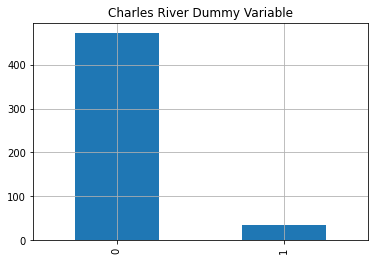

In [ ]:
data['CHAS'].value_counts().plot.bar()
plt.title("Charles River Dummy Variable")
plt.grid()

## Continuous Variable distributions


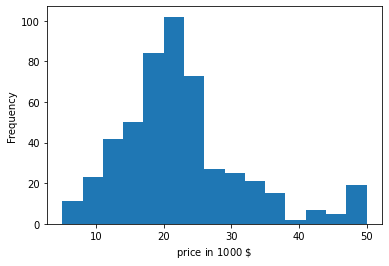

In [ ]:
data['MEDV'].plot.hist(bins=15)
plt.xlabel("price in 1000 $\$$")
plt.show()

In [ ]:
# normalising continuous variables.

for column in data.columns: # this code will work discrete variable as the maximum is 1.
    data[column] = data[column]  / data[column].abs().max()

display(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000071,0.18,0.083273,0.0,0.617681,0.748861,0.652,0.337278,0.041667,0.416315,0.695455,1.000000,0.131156,0.480
1,0.000307,0.00,0.254867,0.0,0.538462,0.731321,0.789,0.409607,0.083333,0.340366,0.809091,1.000000,0.240716,0.432
2,0.000307,0.00,0.254867,0.0,0.538462,0.818337,0.611,0.409607,0.083333,0.340366,0.809091,0.989746,0.106136,0.694
3,0.000364,0.00,0.078587,0.0,0.525832,0.797039,0.458,0.499913,0.125000,0.312236,0.850000,0.994281,0.077430,0.668
4,0.000776,0.00,0.078587,0.0,0.525832,0.814009,0.542,0.499913,0.125000,0.312236,0.850000,1.000000,0.140374,0.724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000704,0.00,0.430065,0.0,0.657865,0.750911,0.691,0.204395,0.041667,0.383966,0.954545,0.987629,0.254675,0.448
502,0.000509,0.00,0.430065,0.0,0.657865,0.697039,0.767,0.188636,0.041667,0.383966,0.954545,1.000000,0.239136,0.412
503,0.000683,0.00,0.430065,0.0,0.657865,0.794533,0.910,0.178741,0.041667,0.383966,0.954545,1.000000,0.148538,0.478
504,0.001232,0.00,0.430065,0.0,0.657865,0.773804,0.893,0.196998,0.041667,0.383966,0.954545,0.991308,0.170661,0.440


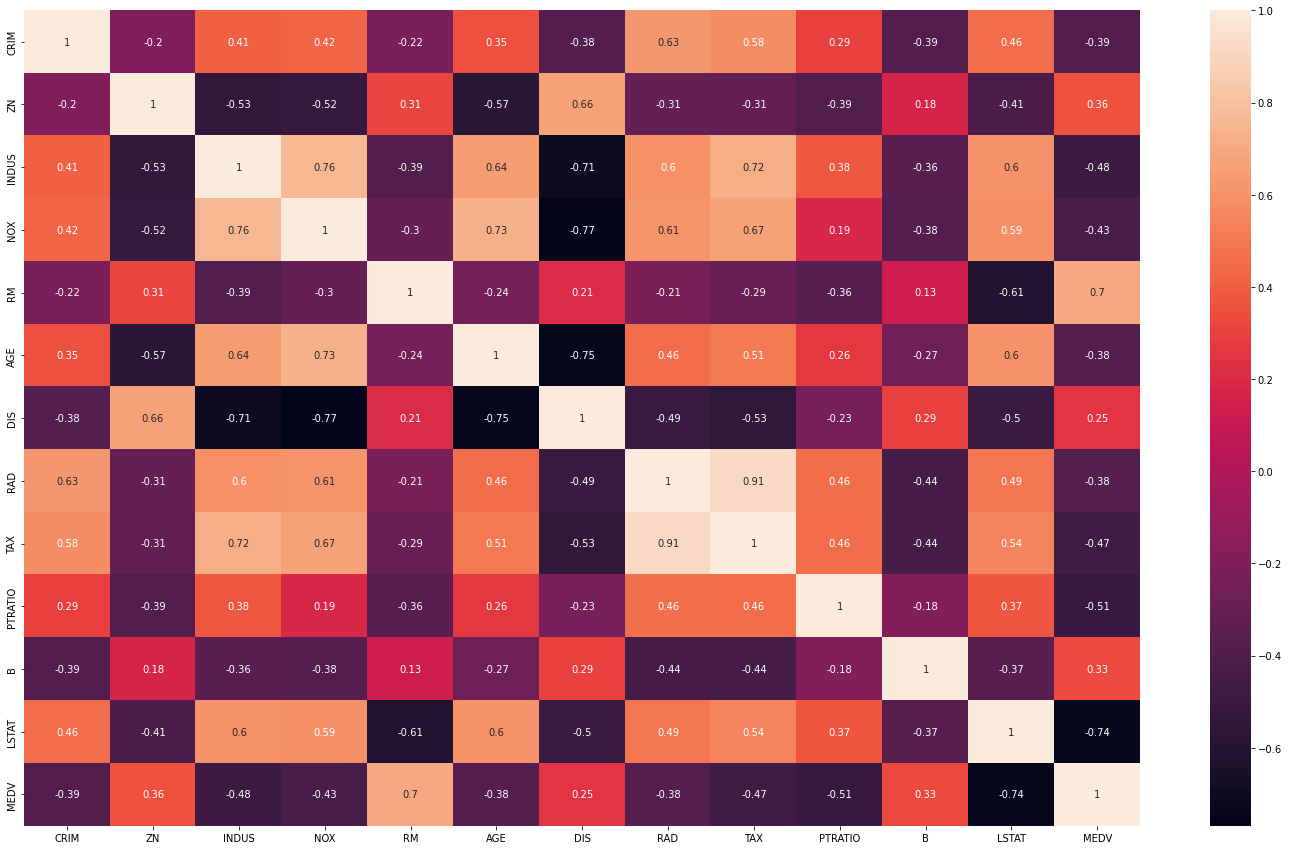

In [ ]:
# comparing data for predictions
plt.figure(figsize=(25,15))
sb.heatmap(data.drop(columns=['CHAS']).corr(),annot =True)

#### We don't need Hot Encoding in this as we only have one dummy encoded variable

Since all of these variables are closely correlated, we will need PCA.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']], data['MEDV'], test_size = 0.2, random_state = 0)

In [ ]:

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

## We will try to implement both multiple regression and ridge regression for the Boston data. 

We will also use Lasso Regression to compare the results of PCA by comparing ridge regression to lasso regression. 